<b><h1>Assignment for week 1 by Tushar Kr Barman</h1><b>

In [60]:
#The required packages are imported
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

<b><h1>Load and preprocess Data</h1><b>

In [61]:
#The dataset is loaded
df = pd.read_csv('PCA_practice_dataset.csv')
df.head()
y = df.to_numpy()  
#Changing the DataFrame into numpy array so that we can apply standard scalar and fit our numpy array 

In [62]:
#Before applying PCA we need to scale the data with mean=0 and standard deviation = 1
scalar = StandardScaler()#Standardize features by removing the mean and scaling to unit variance
y = scalar.fit_transform(y)

<b><h1>Applying PCA</h1><b>

In [63]:
#Applying PCA
pca = PCA()
y = pca.fit_transform(y) #linear dimentionality is reduced after the fitting the dataset

#We will calculate the sum of all the eigen values for the corresponding eigen vectors
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)*100

In [64]:
#Declaring a list of the desired thresholds
thresholds = [i for i in range(90,97+1,1)]

In [65]:
#Making a list of the components required to retain the varience as mentioned in our required threshold list
components = [np.argmax(cumulative_variance>threshold)for threshold in thresholds]

for component, threshold in zip(components, thresholds):
    print("Components required for {}% threshold are : {}".format(threshold,component))

Components required for 90% threshold are : 2
Components required for 91% threshold are : 2
Components required for 92% threshold are : 3
Components required for 93% threshold are : 3
Components required for 94% threshold are : 4
Components required for 95% threshold are : 4
Components required for 96% threshold are : 5
Components required for 97% threshold are : 6


<b><h1>Scree plot</h1><b>

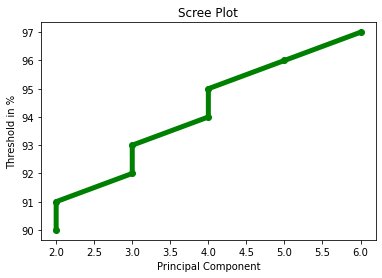

In [66]:
#Plotting these data in the form of a scree plot
plt.plot(components, range(90,97+1,1), 'go-', linewidth=5)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Threshold in %')
plt.show()

<b><h1>Dimensionality reduction</h1><b>

In [67]:
#We perform dimensionality reduction
#the number of principal components retained due to the thresholding.
y_orig = y

for component,var in zip(components,thresholds):
    pca = PCA(n_components = component) #Passing the number of components required for each threshold
    y_transformed = pca.fit_transform(y_orig)  #We get the reduced dimensionality dataset
    print('Performing dimensionality reduction to retain {}% threshold'.format(var))
    print('After dimensionality reduction, the new shape to the dataset is :',y_transformed.shape)
    print('\n')

Performing dimensionality reduction to retain 90% threshold
After dimensionality reduction, the new shape to the dataset is : (8041, 2)


Performing dimensionality reduction to retain 91% threshold
After dimensionality reduction, the new shape to the dataset is : (8041, 2)


Performing dimensionality reduction to retain 92% threshold
After dimensionality reduction, the new shape to the dataset is : (8041, 3)


Performing dimensionality reduction to retain 93% threshold
After dimensionality reduction, the new shape to the dataset is : (8041, 3)


Performing dimensionality reduction to retain 94% threshold
After dimensionality reduction, the new shape to the dataset is : (8041, 4)


Performing dimensionality reduction to retain 95% threshold
After dimensionality reduction, the new shape to the dataset is : (8041, 4)


Performing dimensionality reduction to retain 96% threshold
After dimensionality reduction, the new shape to the dataset is : (8041, 5)


Performing dimensionality reductio